# Test statistics
http://lijin-thu.github.io/04.%20scipy/04.03%20statistics%20with%20scipy.html

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
heights = array([1.46, 1.79, 2.01, 1.75, 1.56, 1.69, 1.88, 1.76, 1.88, 1.78])

In [23]:
# Numpy 自带简单的统计方法：
print (heights.mean())
print (heights.min())
print (heights.max())
print (heights.std())

1.7559999999999998
1.46
2.01
0.15081114017207078


In [29]:
from numpy import nanmean
print (nanmedian(heights))    # 忽略nan值之后的中位数

1.77


In [30]:
# 导入 Scipy 的统计模块：
import scipy.stats.stats as st


In [31]:

print (st.mode(heights))           # 众数及其出现次数
print (st.skew(heights))       # 偏度
print (st.kurtosis(heights))   # 峰度

ModeResult(mode=array([1.88]), count=array([2]))
-0.3935244564726347
-0.33067209772439865


## 连续分布
### 正态分布

In [32]:
from scipy.stats import norm

In [33]:
#从正态分布产生500个随机点：

x_norm = norm.rvs(size=500)
type(x_norm)

numpy.ndarray

[  6.   9.  47.  84. 111. 114.  80.  38.   8.   3.]
[-3.00658119 -2.38198524 -1.75738928 -1.13279333 -0.50819738  0.11639857
  0.74099452  1.36559047  1.99018643  2.61478238  3.23937833]


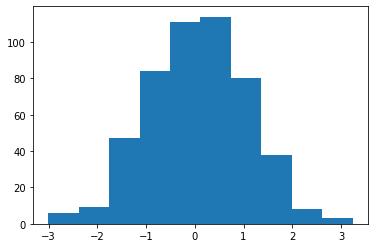

In [36]:

h = hist(x_norm)
print (h[0]) #counts
print  (h[1])#bin centers

C:\Users\wach9011\AppData\Local\Continuum\anaconda3_32bit\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


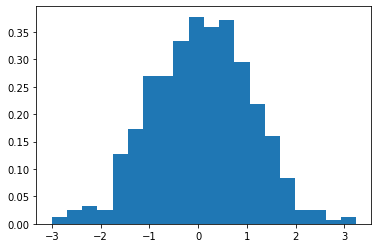

In [37]:
# 归一化直方图（用出现频率代替次数），将划分区间变为 20（默认 10）：
h = hist(x_norm, normed=True, bins=20)

In [38]:
# 在这组数据下，正态分布参数的最大似然估计值为：
x_mean, x_std = norm.fit(x_norm)

print (x_mean) 
print (x_std)  

0.05212889292455047
1.016983183892863


C:\Users\wach9011\AppData\Local\Continuum\anaconda3_32bit\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


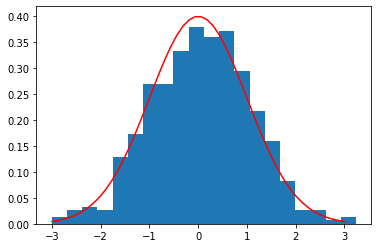

In [39]:
#  将真实的概率密度函数与直方图进行比较：

h = hist(x_norm, normed=True, bins=20)

x = linspace(-3,3,50)
p = plot(x, norm.pdf(x), 'r-')

In [40]:
# 导入积分函数：

In [41]:

from scipy.integrate import trapz 

In [42]:
# 通过积分，计算落在某个区间的概率大小：

95.45% of the values lie between -2 and 2)


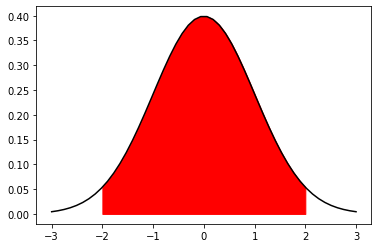

In [46]:
x1 = linspace(-2,2,108)
p = trapz(norm.pdf(x1), x1) 
print ('{:.2%} of the values lie between -2 and 2)'.format(p))

fill_between(x1, norm.pdf(x1), color = 'red')
plot(x, norm.pdf(x), 'k-')

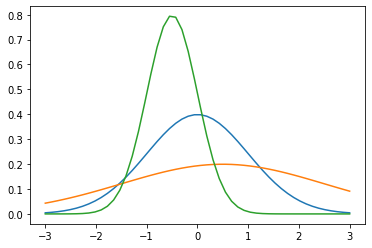

In [48]:
#默认情况，正态分布的参数为均值0，标准差1，即标准正态分布。
# 可以通过 loc 和 scale 来调整这些参数，一种方法是调用相关函数时进行输入：

p = plot(x, norm.pdf(x, loc=0, scale=1))
p = plot(x, norm.pdf(x, loc=0.5, scale=2))
p = plot(x, norm.pdf(x, loc=-0.5, scale=.5))

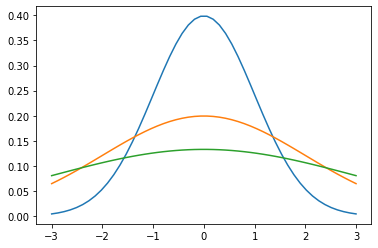

In [52]:
#另一种则是将 loc, scale 作为参数直接输给 norm 生成相应的分布：
p = plot(x, norm(loc=0, scale=1).pdf(x))
p = plot(x, norm(loc=0, scale=2).pdf(x))
p = plot(x, norm(loc=0, scale=3).pdf(x))